In [1]:
%pylab inline
from tqdm import tqdm_notebook

Populating the interactive namespace from numpy and matplotlib


# Assignment 1

## Question 1

1. Run simulations using u1=0.003 and u2=0.001 for 3 different population sizes N=100, 1000, 10000
2. Repeat simulation for N=1000 using u1=0.07 and u2=0.001; Use T=1500 in both cases.


Verify if the equilibrium value for frequency of type 0 and type 1 matches with theoretical predictions

### Case 1: u1=0.003 and u2=0.001, N = 100, 1000, 10000

In [2]:
population_sizes = [100,1000,10000]
T = 1500
u1 = 0.003
u2 = 0.001

In [3]:
frequencies_list = []
for N in population_sizes:
    population = np.random.randint(0,2,size=(1,N))
    frequencies = []
    for generation in tqdm_notebook(range(T),leave=False):
        for index,member in enumerate(population[0]):
            mutation_chance = np.random.random()    
            if (member and mutation_chance < u2) or (not member and mutation_chance < u1):
                population[0,index] = not member
        frequencies.append(np.count_nonzero(population)/N)
    frequencies_list.append(frequencies)

In [4]:
u1/(u1+u2)

0.75

In [5]:
data = [ freq_list[700:] for freq_list in frequencies_list ]
means = np.mean(data, axis=1)
stds = np.std(data, axis=1)
print(means, stds)

[0.6843125  0.75774375 0.74912275] [0.03647639 0.00698896 0.00362761]


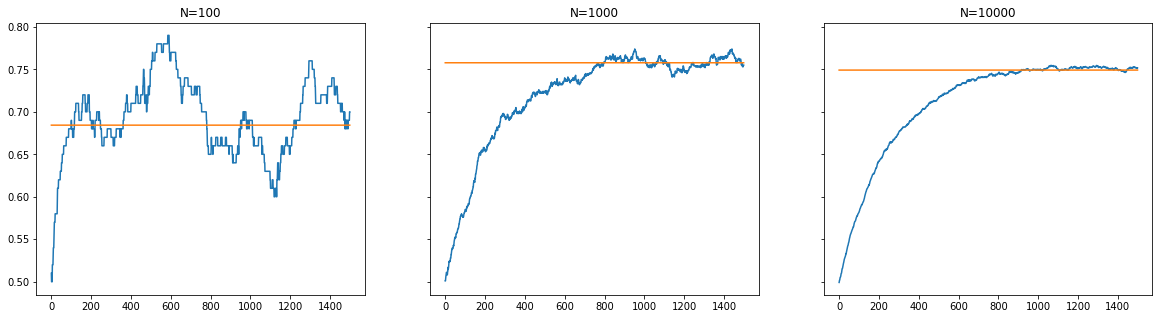

In [6]:
fig,ax = plt.subplots(1,len(population_sizes),figsize=(20,5),sharex=True,sharey=True)
for index, axis in enumerate(ax):
    axis.plot(frequencies_list[index])
    axis.plot(means[index]*ones_like(frequencies_list[index]))
#     plt.setp(axis.get_xticklabels(),color='w')
#     plt.setp(axis.get_yticklabels(),color='w')
    axis.set_title('N={}'.format(population_sizes[index]),color='k')

### Case 2: u1=0.07 and u2=0.001, N = 1000

In [7]:
population_sizes = [1000]
T = 1500
u1 = 0.07
u2 = 0.001

In [8]:
u1/(u1+u2)

0.9859154929577465

In [9]:
frequencies_list = []
for N in population_sizes:
    population = np.random.randint(0,2,size=(1,N))
    frequencies = []
    for generation in tqdm_notebook(range(T),leave=False):
        for index,member in enumerate(population[0]):
            mutation_chance = np.random.random()    
            if (member and mutation_chance < u2) or (not member and mutation_chance < u1):
                population[0,index] = not member
        frequencies.append(np.count_nonzero(population)/N)
    frequencies_list.append(frequencies)

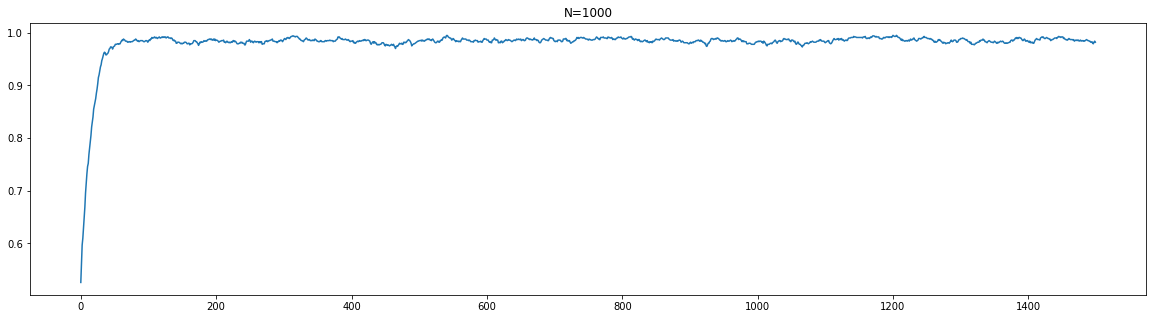

In [10]:
fig,axis = plt.subplots(1,len(population_sizes),figsize=(20,5))
axis.plot(frequencies_list[0])
# plt.setp(axis.get_xticklabels(),color='w')
# plt.setp(axis.get_yticklabels(),color='w')
axis.set_title('N={}'.format(population_sizes[0]),color='k');

In [11]:
data = frequencies_list[0][100:]
means = np.mean(data)
stds = np.std(data)
print(means, stds)

0.9852714285714285 0.00397374033435729
